In [1]:
# Initial Analysis and Insights of Dataset and Included Subdata with Respect to Cross-Correlations and Respective Plots

In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bus_file = "C:/Users/SUUSER/Google Drive/CS 210/CS 210 Project Master/Yelp Data Files/bus_v1.csv"

# Open the file for reading and read in data
bus_file_handler = open(bus_file, "r")
bus_data = pd.read_csv(bus_file_handler, sep=",")
bus_file_handler.close()

bus_data.head(3)

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0


In [4]:
bus_data.stars.mean()

3.6897459514448325

In [5]:
# Data Plots

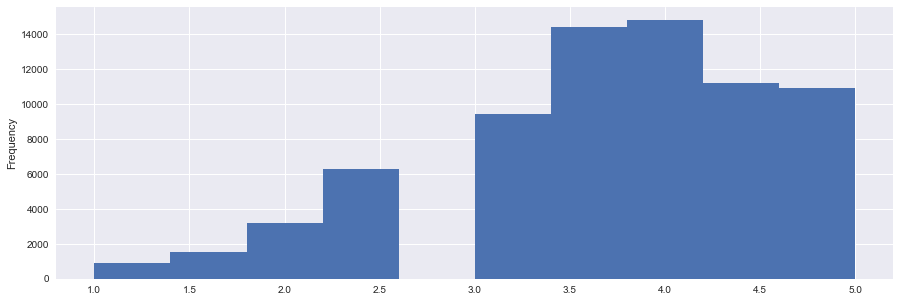

In [47]:
bus_data.stars.plot(kind="hist", figsize=(15,5))

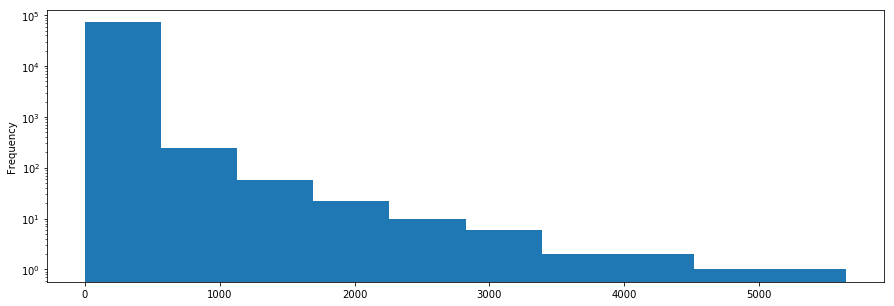

In [7]:
bus_data.review_count.plot(kind="hist", figsize=(15,5), logy=True)

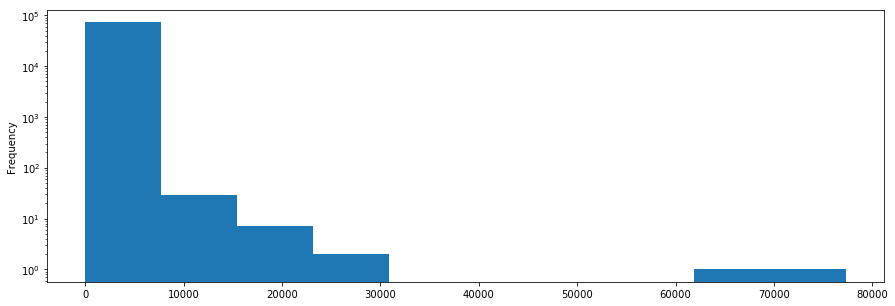

In [8]:
bus_data.Number_of_Checkins.plot(kind="hist", figsize=(15,5), logy=True)

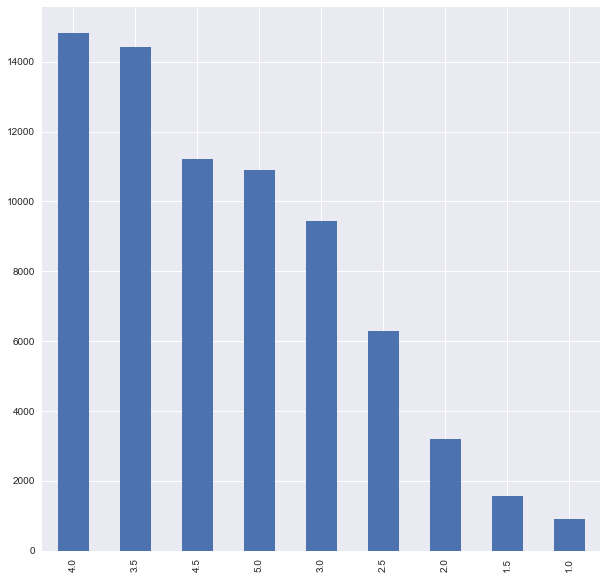

In [50]:
bus_data.stars.value_counts().plot(kind="bar", figsize=(10,10))

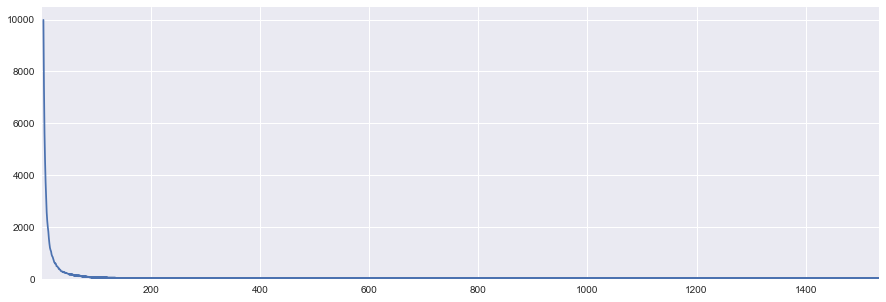

In [57]:
bus_data.review_count.value_counts().plot(kind="line", xlim=1, ylim=1, logy=False, figsize=(15,5))

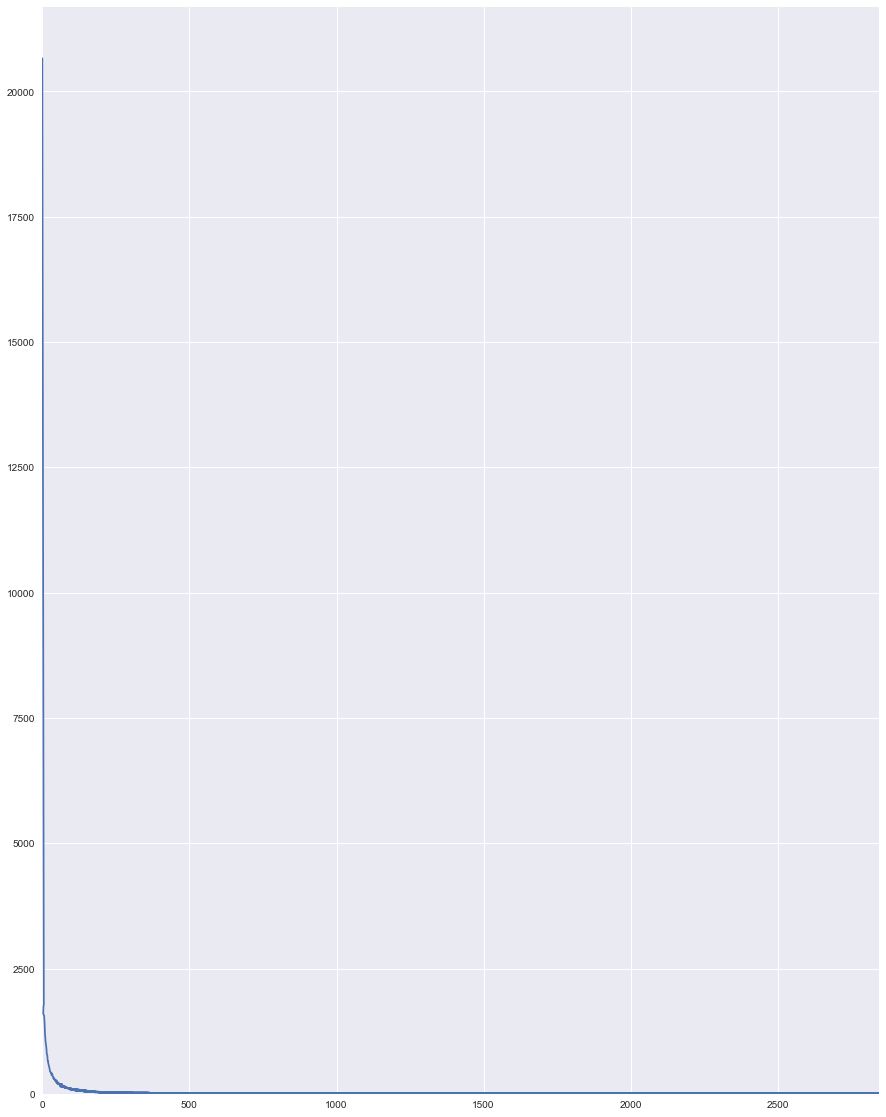

In [59]:
bus_data.Number_of_Checkins.value_counts().plot(kind="line", xlim=0.01, ylim=1, logy=False, figsize=(15,20))

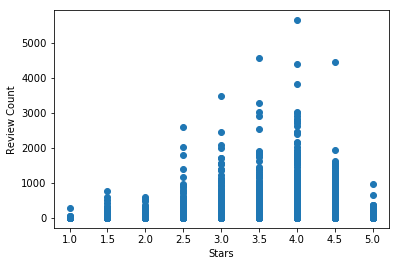

In [12]:
plt.scatter(bus_data.stars, bus_data.review_count)
plt.xlabel('Stars')
plt.ylabel('Review Count')

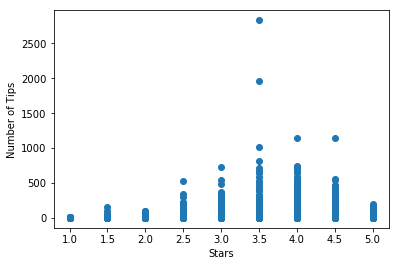

In [13]:
plt.scatter(bus_data.stars, bus_data.Number_of_Tips)
plt.xlabel('Stars')
plt.ylabel('Number of Tips')

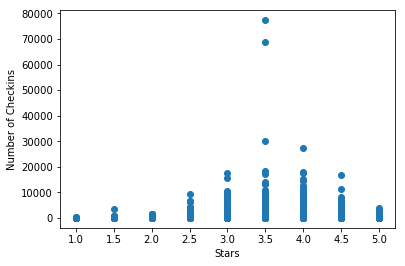

In [14]:
plt.scatter(bus_data.stars, bus_data.Number_of_Checkins)
plt.xlabel('Stars')
plt.ylabel('Number of Checkins')

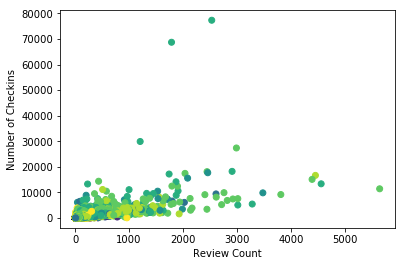

In [15]:
plt.scatter(bus_data.review_count, bus_data.Number_of_Checkins, c=bus_data.stars)
plt.xlabel('Review Count')
plt.ylabel('Number of Checkins')

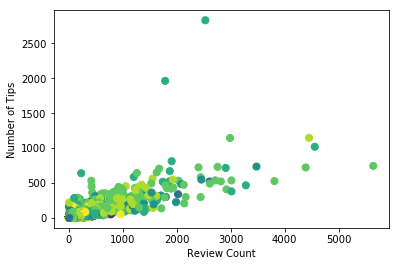

In [16]:
plt.scatter(bus_data.review_count, bus_data.Number_of_Tips, c=bus_data.stars, s=50)
plt.xlabel('Review Count')
plt.ylabel('Number of Tips')

(array([[  7.23950000e+04,   2.37000000e+02,   5.00000000e+01,
           1.30000000e+01,   3.00000000e+00,   4.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  5.00000000e+00,   4.00000000e+00,   6.00000000e+00,
           5.00000000e+00,   4.00000000e+00,   0.00000000e+00,
           2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           1.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           3.00000000e+00,   2.00000000e+00,   1.00000000e+00,
           0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
      

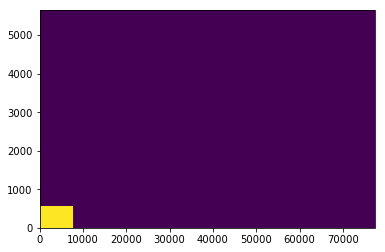

In [17]:
plt.hist2d(bus_data.Number_of_Checkins, bus_data.review_count)

In [18]:
# Statistical Analysis of Star - Sub-data Relation

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
StarvSubData = bus_data.loc[:,["stars","review_count","Number_of_Checkins","Price_Range","Delivery","Takes_Reservations"]]
StarvSubData.head(5)

,stars,review_count,Number_of_Checkins,Price_Range,Delivery,Takes_Reservations
0,4.5,4,0,1.0,0.0,0.0
1,3.5,4,0,1.0,NaN,NaN
2,5.0,3,0,NaN,NaN,NaN
3,2.5,5,9,NaN,NaN,NaN
4,2.5,5,0,2.0,NaN,NaN


In [21]:
corStarvSubData = StarvSubData.corr(method='pearson')
corStarvSubData

,stars,review_count,Number_of_Checkins,Price_Range,Delivery,Takes_Reservations
stars,1.000000,0.018736,0.000007,0.038314,0.015523,0.134673
review_count,0.018736,1.000000,0.663280,0.064200,-0.075051,0.142351
Number_of_Checkins,0.000007,0.663280,1.000000,0.025464,-0.075959,0.082557
Price_Range,0.038314,0.064200,0.025464,1.000000,-0.039837,0.545812
Delivery,0.015523,-0.075051,-0.075959,-0.039837,1.000000,-0.025161
Takes_Reservations,0.134673,0.142351,0.082557,0.545812,-0.025161,1.000000


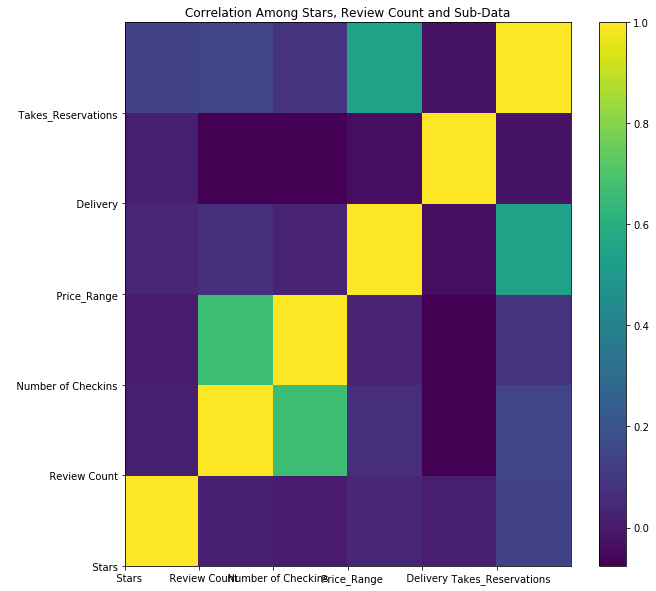

In [22]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
plt.title('Correlation Among Stars, Review Count and Sub-Data')
labels=["   Stars","   Review Count","   Number of Checkins","   Price_Range","   Delivery","   Takes_Reservations"]
ax1.set(xticks=np.arange(len(labels)), xticklabels=labels)
ax1.set(yticks=np.arange(len(labels)), yticklabels=labels)
plt.pcolor(corStarvSubData)
plt.colorbar();

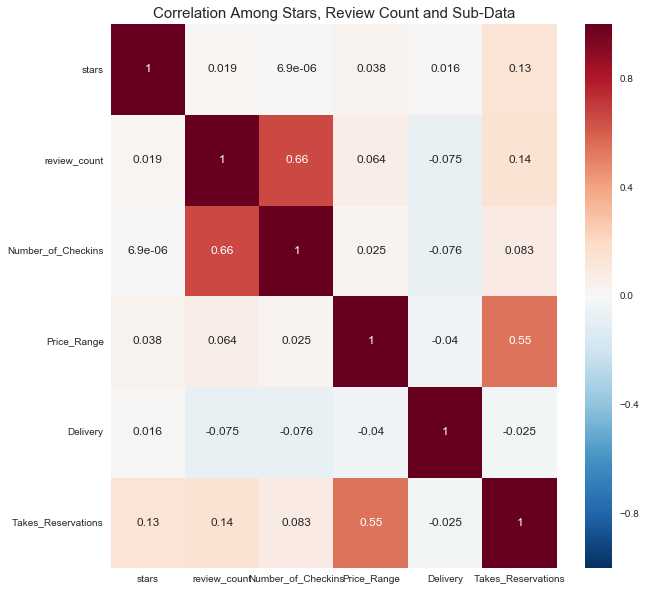

In [23]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
plt.title('Correlation Among Stars, Review Count and Sub-Data', size=15)
sns.heatmap(corStarvSubData,annot=True, annot_kws={"size":12});

In [24]:
# Kendall's Tau Analysis

In [25]:
rhoStarvSubData = StarvSubData.corr(method='spearman')
rhoStarvSubData

,stars,review_count,Number_of_Checkins,Price_Range,Delivery,Takes_Reservations
stars,1.000000,-0.034888,-0.131680,0.050821,0.012302,0.122445
review_count,-0.034888,1.000000,0.715750,-0.015817,-0.094023,0.206492
Number_of_Checkins,-0.131680,0.715750,1.000000,-0.099971,-0.193453,0.060125
Price_Range,0.050821,-0.015817,-0.099971,1.000000,-0.029056,0.554291
Delivery,0.012302,-0.094023,-0.193453,-0.029056,1.000000,-0.025161
Takes_Reservations,0.122445,0.206492,0.060125,0.554291,-0.025161,1.000000


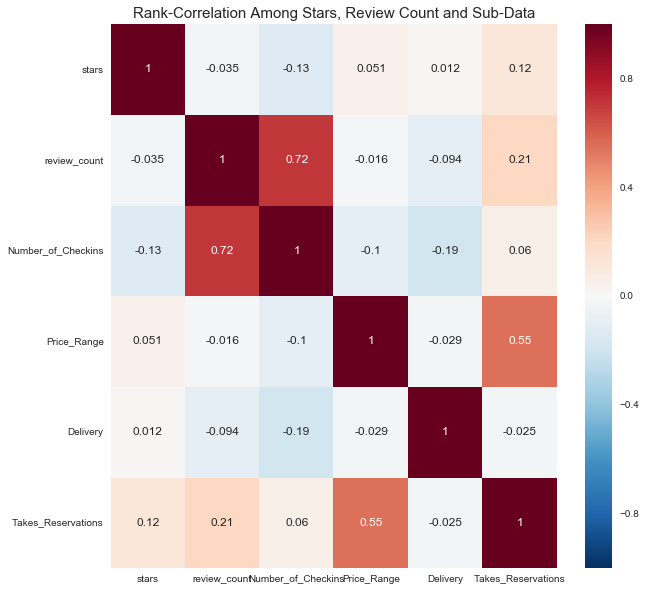

In [26]:
fig = plt.figure(figsize=(10,10))
plt.title('Rank-Correlation Among Stars, Review Count and Sub-Data', size=15)
sns.heatmap(rhoStarvSubData,annot=True, annot_kws={"size":12});

In [27]:
# Since Pandas does not calculate the p-values related to the significance of the correlation tests, we need to get that information from the SciPy module.

In [28]:
import scipy.stats as sp

In [29]:
rho, p_value = sp.spearmanr(StarvSubData)
p_value;   # hidden from the output for clarity

In [30]:
rho[0,[1,2,3,4,5]]   # 0.Star 1.Review Count 2.Number of Checkins 3.Price_Range 4.Delivery 5.Takes_Reservations

array([-0.03488787, -0.13167974,  0.11003032,  0.05098372,  0.05538845])

In [31]:
p_value[0,[1,2,3,4,5]]

array([  4.85795858e-021,   1.16306391e-278,   1.08056638e-194,
         4.47281752e-043,   1.56015551e-050])

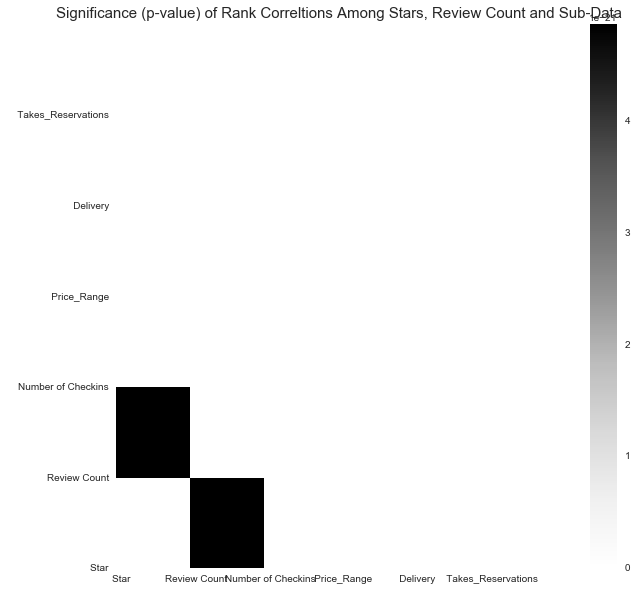

In [32]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
plt.title('Significance (p-value) of Rank Correltions Among Stars, Review Count and Sub-Data', size=15)
labels=["    Star","    Review Count","    Number of Checkins","   Price_Range","   Delivery","   Takes_Reservations"]
ax1.set(xticks=np.arange(len(labels)), xticklabels=labels)
ax1.set(yticks=np.arange(len(labels)), yticklabels=labels)
plt.pcolor(p_value)
plt.colorbar();

In [33]:
tauStarvSubData = StarvSubData.corr(method='kendall')
tauStarvSubData

,stars,review_count,Number_of_Checkins,Price_Range,Delivery,Takes_Reservations
stars,1.000000,-0.024284,-0.095148,0.043077,0.010948,0.109072
review_count,-0.024284,1.000000,0.557261,-0.011660,-0.077345,0.169847
Number_of_Checkins,-0.095148,0.557261,1.000000,-0.078309,-0.158898,0.049360
Price_Range,0.043077,-0.011660,-0.078309,1.000000,-0.028336,0.540525
Delivery,0.010948,-0.077345,-0.158898,-0.028336,1.000000,-0.025161
Takes_Reservations,0.109072,0.169847,0.049360,0.540525,-0.025161,1.000000


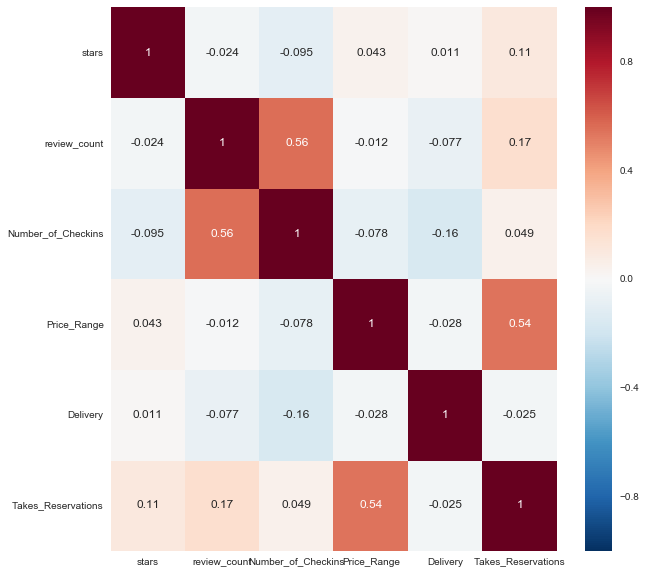

In [34]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(tauStarvSubData,annot=True, annot_kws={"size":12});

In [35]:
tau, p_value = sp.kendalltau(StarvSubData.stars, StarvSubData.review_count)  

In [36]:
p_value # there is a strong, positive monotonic correlation

8.8816971530167022e-23

In [37]:
cols = StarvSubData.columns
l = len(cols)
p_vals = {}
taus = {}
for c1 in range(l):   # calculate tau for all pairs of columns
    for c2 in range(c1+1):
        taus[c1,c2], p_vals[c1,c2] = sp.kendalltau(StarvSubData.iloc[:,c1], StarvSubData.iloc[:,c2])

In [38]:
for (pair,tau) in sorted(taus.items(), key=lambda x: -x[1] ):  
    if (tau<0.99) & (tau>0.5):print(cols[pair[0]],"-",cols[pair[1]], "[ Tau=", tau, "]")
# sort from the most correlated to see what to inspect

Number_of_Checkins - review_count [ Tau= 0.557260784925 ]


In [39]:
for (pair,p) in sorted(p_vals.items(), key=lambda x: -x[1] ):  
    if (p>0.05) & (p<0.99): print(cols[pair[0]],"-",cols[pair[1]], "[ p=", p, "]") 
# prints the statistically insignificant pairs according to tau calculations 

In [40]:
def scatterTwoSeries(series1, series2, dataframe):
    fig = plt.figure(figsize=(10,10))
    X = series1#.values
    Y = series2#.values
    ax = sns.regplot(x=X, y=Y, label="Star", data=dataframe)
    for i, ctr in enumerate(bus_data.stars):
        ax.annotate(ctr, (X[i],Y[i]),size=10)

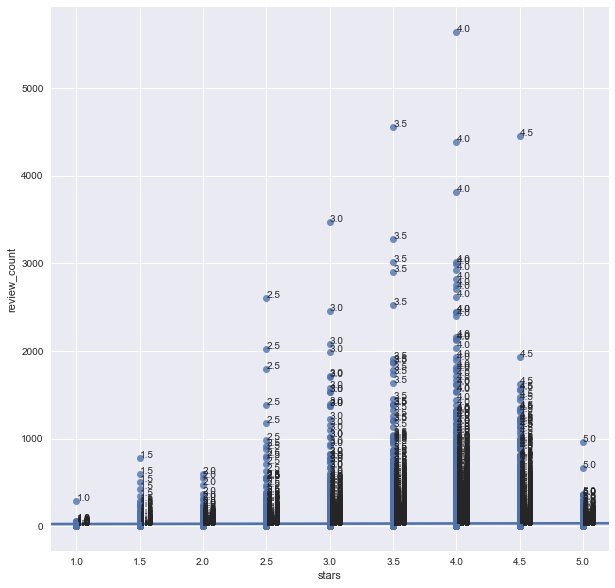

In [41]:
scatterTwoSeries(bus_data.stars, bus_data.review_count, bus_data)

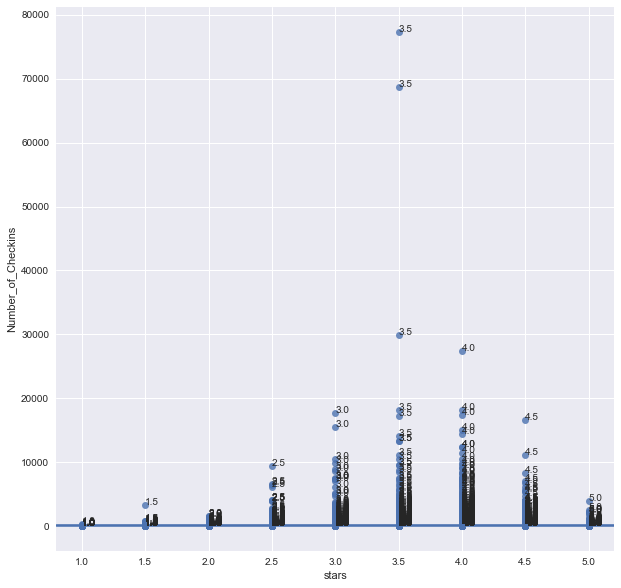

In [42]:
scatterTwoSeries(bus_data.stars, bus_data.Number_of_Checkins, bus_data)